In [1]:
import re
import requests
import pandas as pd
import matplotlib.pyplot as plt

from datetime import date
from lxml import html

import seaborn as sns
from itertools import combinations


ModuleNotFoundError: No module named 'scholarly'

In [2]:
dept = "Donald P. Bellisario College of Communications"

jiyoung_name = "Jiyoung Cha"
jiyoung_dept = dept
jiyoung_url  = "https://bellisario.psu.edu/people/jiyoung-cha"

frank_name = "Frank Dardis"
frank_dept = dept
frank_url  = "https://bellisario.psu.edu/people/frank-dardis"

homero_name = "Homero Gil de Zúñiga"
homero_dept = dept
homero_url  = "https://bellisario.psu.edu/people/homero-gil-de-z%C3%BA%C3%B1iga"

mary_name = "Mary Beth Oliver"
mary_dept = dept
mary_url  = "https://bellisario.psu.edu/people/mary-beth-oliver"

patrick_name = "Patrick Lee Plaisance"
patrick_dept = dept
patrick_url  = "https://bellisario.psu.edu/people/patrick-lee-plaisance"

michael_name = "Michael Schmierbach"
michael_dept = dept
michael_url  = "https://bellisario.psu.edu/people/michael-schmierbach"

fuyuan_name = "Fuyuan Shen"
fuyuan_dept = dept
fuyuan_url  = "https://bellisario.psu.edu/people/fuyuan-shen"

heather_name = "Heather Shoenberger"
heather_dept = dept
heather_url  = "https://bellisario.psu.edu/people/heather-shoenberger"

chris_name = "Chris Skurka"
chris_dept = dept
chris_url  = "https://bellisario.psu.edu/people/chris-skurka"

shyam_name = "S. Shyam Sundar"
shyam_dept = dept
shyam_url  = "https://bellisario.psu.edu/people/s-shyam-sundar"


In [3]:
headers = {"User-Agent": "Mozilla/5.0 (Teaching Script)"}

In [5]:
BELLISARIO_DEPT = "Donald P. Bellisario College of Communications"

faculty = [
    {"key": "jiyoung", "name": jiyoung_name, "department": BELLISARIO_DEPT, "url": jiyoung_url},
    {"key": "frank",   "name": frank_name,   "department": BELLISARIO_DEPT, "url": frank_url},
    {"key": "homero",  "name": homero_name,  "department": BELLISARIO_DEPT, "url": homero_url},
    {"key": "mary",    "name": mary_name,    "department": BELLISARIO_DEPT, "url": mary_url},
    {"key": "patrick", "name": patrick_name, "department": BELLISARIO_DEPT, "url": patrick_url},
    {"key": "michael", "name": michael_name, "department": BELLISARIO_DEPT, "url": michael_url},
    {"key": "fuyuan",  "name": fuyuan_name,  "department": BELLISARIO_DEPT, "url": fuyuan_url},
    {"key": "heather", "name": heather_name, "department": BELLISARIO_DEPT, "url": heather_url},
    {"key": "chris",   "name": chris_name,   "department": BELLISARIO_DEPT, "url": chris_url},
    {"key": "shyam",   "name": shyam_name,   "department": BELLISARIO_DEPT, "url": shyam_url},
]


In [47]:
def scrape_bellisario_profile(name, dept, url, headers, title_pattern, email_pattern):
    page_html = requests.get(url, headers=headers).text
    tree = html.fromstring(page_html)

    page_text = " ".join(tree.xpath("//body//text()"))
    page_text = re.sub(r"\s+", " ", page_text).strip()

    scraped_title = " ".join(re.findall(title_pattern, page_text)[:1]).strip()
    scraped_email = " ".join(re.findall(email_pattern, page_text)[:1]).strip()

    areas = tree.xpath(
    "//main//h3[normalize-space()='Areas of Expertise']"
    "/parent::*"
    "/following-sibling::*[1]//li//text()"
    )
    areas = list(filter(None, map(str.strip, areas)))

    interests_list = areas
    scraped_interests = "; ".join(interests_list)
    n_interest_items = len(interests_list)

    row = pd.DataFrame([{
        "name": name,
        "department": dept,
        "url": url,
        "scraped_title": scraped_title,
        "scraped_email": scraped_email,
        "scraped_interests": scraped_interests,
        "n_interest_items": n_interest_items
    }])

    return row

In [31]:
faculty = [
    (jiyoung_name, jiyoung_dept, jiyoung_url),
    (frank_name, frank_dept, frank_url),
    (homero_name, homero_dept, homero_url),
    (mary_name, mary_dept, mary_url),
    (patrick_name, patrick_dept, patrick_url),
    (michael_name, michael_dept, michael_url),
    (fuyuan_name, fuyuan_dept, fuyuan_url),
    (heather_name, heather_dept, heather_url),
    (chris_name, chris_dept, chris_url),
    (shyam_name, shyam_dept, shyam_url)
]


In [48]:
rows = []
for name, dept, url in faculty:
    row_df = scrape_bellisario_profile(
        name=name,
        dept=dept,
        url=url,
        headers=headers,
        title_pattern=title_pattern,
        email_pattern=email_pattern
    )
    rows.append(row_df)

In [49]:
scraped_profiles = pd.concat(rows, ignore_index=True)
print(scraped_profiles)

                    name                                      department  \
0            Jiyoung Cha  Donald P. Bellisario College of Communications   
1           Frank Dardis  Donald P. Bellisario College of Communications   
2   Homero Gil de Zúñiga  Donald P. Bellisario College of Communications   
3       Mary Beth Oliver  Donald P. Bellisario College of Communications   
4  Patrick Lee Plaisance  Donald P. Bellisario College of Communications   
5    Michael Schmierbach  Donald P. Bellisario College of Communications   
6            Fuyuan Shen  Donald P. Bellisario College of Communications   
7    Heather Shoenberger  Donald P. Bellisario College of Communications   
8           Chris Skurka  Donald P. Bellisario College of Communications   
9        S. Shyam Sundar  Donald P. Bellisario College of Communications   

                                                 url  \
0      https://bellisario.psu.edu/people/jiyoung-cha   
1     https://bellisario.psu.edu/people/frank-dardi

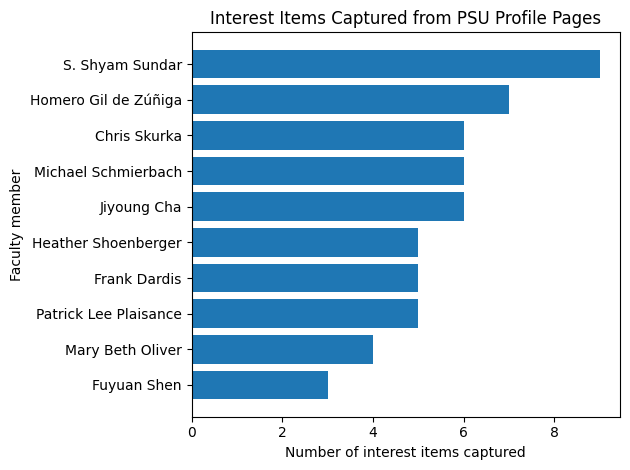

In [50]:
scraped_profiles_sorted = scraped_profiles.sort_values("n_interest_items")

plt.figure()
plt.barh(scraped_profiles_sorted["name"], scraped_profiles_sorted["n_interest_items"])
plt.title("Interest Items Captured from PSU Profile Pages")
plt.xlabel("Number of interest items captured")
plt.ylabel("Faculty member")
plt.tight_layout()
plt.show()


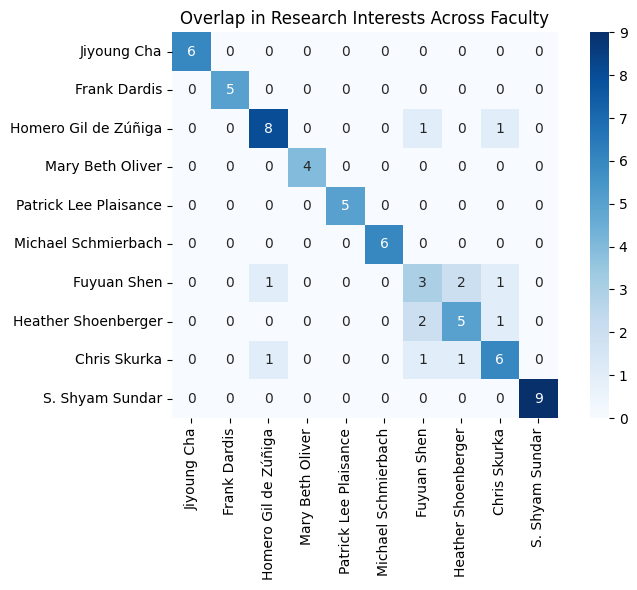

In [51]:
df = scraped_profiles.copy()

df["interest_set"] = df["scraped_interests"].apply(
    lambda x: set([i.strip().lower() for i in x.split(";") if i.strip()])
)

names = df["name"].tolist()


overlap = pd.DataFrame(index=names, columns=names)

for i, row_i in df.iterrows():
    for j, row_j in df.iterrows():
        overlap.loc[row_i["name"], row_j["name"]] = \
            len(row_i["interest_set"] & row_j["interest_set"])

overlap = overlap.astype(int)


plt.figure(figsize=(8, 6))
sns.heatmap(overlap, annot=True, cmap="Blues", square=True)
plt.title("Overlap in Research Interests Across Faculty")
plt.tight_layout()
plt.show()


In [53]:
df = scraped_profiles.copy()

df["interest_set"] = df["scraped_interests"].apply(
    lambda x: set(i.strip().lower() for i in x.split(";") if i.strip())
)

overlaps = []

for (i, row_i), (j, row_j) in combinations(df.iterrows(), 2):
    common = row_i["interest_set"] & row_j["interest_set"]
    if len(common) > 0:
        overlaps.append({
            "prof_1": row_i["name"],
            "prof_2": row_j["name"],
            "n_shared_interests": len(common),
            "shared_interests": ", ".join(sorted(common))
        })

overlap_df = pd.DataFrame(overlaps)

overlap_df.sort_values("n_shared_interests", ascending=False)


,prof_1,prof_2,n_shared_interests,shared_interests
2,Fuyuan Shen,Heather Shoenberger,2,"advertising, health communication"
0,Homero Gil de Zúñiga,Fuyuan Shen,1,political communication
1,Homero Gil de Zúñiga,Chris Skurka,1,media effects
3,Fuyuan Shen,Chris Skurka,1,health communication
4,Heather Shoenberger,Chris Skurka,1,health communication


In [54]:
overlap_df.to_csv("faculty_interest_overlap.csv", index=False)